In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hap2015 = pd.read_csv('2015.csv')
hap2016 = pd.read_csv('2016.csv')
hap2017 = pd.read_csv('2017.csv')
hap2018 = pd.read_csv('2018.csv')
hap2019 = pd.read_csv('2019.csv')

hap2015['Year'] = 2015
hap2016['Year'] =2016
hap2017['Year'] =2017
hap2018['Year'] =2018
hap2019['Year'] =2019

merg =[hap2015, hap2016, hap2017, hap2018, hap2019]
mer = pd.concat(merg)

In [3]:
print(hap2015.columns)
print(hap2016.columns)
print(hap2017.columns)
print(hap2018.columns)
print(hap2019.columns)


# there were many typos in the columns name, so i correct it on the data set
# now i will keep only the complete columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object')
Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
  

In [4]:
mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                           782 non-null    int

In [5]:
mer = mer[['Country' , 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity','Year']]

In [12]:
mer.info()
mer.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Health (Life Expectancy)       782 non-null    float64
 5   Freedom                        782 non-null    float64
 6   Trust (Government Corruption)  782 non-null    float64
 7   Generosity                     782 non-null    float64
 8   Year                           782 non-null    int64  
 9   General rank (2015-2019)       782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,General rank (2015-2019)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,5.0
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,6.0
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,10.0
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,12.0
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,26.0


In [7]:
mer['Trust (Government Corruption)'].fillna(0.3)

0      0.41978
1      0.14145
2      0.48357
3      0.36503
4      0.32957
        ...   
151    0.41100
152    0.14700
153    0.02500
154    0.03500
155    0.09100
Name: Trust (Government Corruption), Length: 782, dtype: float64

In [8]:
mer.loc[ mer['Trust (Government Corruption)'].isna() ,'Trust (Government Corruption)'] = 0.3

In [9]:
mer['General rank (2015-2019)'] = mer['Happiness Score'].rank(ascending=False)
mer.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,General rank (2015-2019)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,5.0
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,6.0
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,10.0
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,12.0
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,26.0


In [10]:
mer.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,General rank (2015-2019)
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,0.612416,0.411091,0.125659,0.218576,2016.993606,391.500000
std,45.182384,1.127456,0.407340,0.248309,0.152880,0.105933,0.122321,1.417364,225.888131
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000
25%,40.000000,4.509750,0.606500,0.440183,0.309768,0.054250,0.130000,2016.000000,195.875000
50%,79.000000,5.322000,0.982205,0.647310,0.431000,0.091033,0.201982,2017.000000,391.500000
75%,118.000000,6.189500,1.236187,0.808000,0.531000,0.156243,0.278832,2018.000000,586.750000
max,158.000000,7.769000,2.096000,1.141000,0.724000,0.551910,0.838075,2019.000000,782.000000


In [20]:
mer.sort_values(['General rank (2015-2019)'], ascending=True).head(15)

# by the rank, Finnland, Dennmark and Norway always appears on the top

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,General rank (2015-2019)
0,Finland,1,7.769,1.340000,0.986000,0.596000,0.393000,0.153000,2019,1.0
0,Finland,1,7.632,1.305000,0.874000,0.681000,0.393000,0.202000,2018,2.0
1,Denmark,2,7.600,1.383000,0.996000,0.592000,0.410000,0.252000,2019,3.0
1,Norway,2,7.594,1.456000,0.861000,0.686000,0.340000,0.286000,2018,4.0
0,Switzerland,1,7.587,1.396510,0.941430,0.665570,0.419780,0.296780,2015,5.0
1,Iceland,2,7.561,1.302320,0.947840,0.628770,0.141450,0.436300,2015,6.0
2,Denmark,3,7.555,1.351000,0.868000,0.683000,0.408000,0.284000,2018,7.0
2,Norway,3,7.554,1.488000,1.028000,0.603000,0.341000,0.271000,2019,8.0
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.315964,0.362012,2017,9.0
2,Denmark,3,7.527,1.325480,0.874640,0.649380,0.483570,0.341390,2015,10.0


In [21]:
mer.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,General rank (2015-2019)
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,5.0
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,6.0
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,10.0
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,12.0
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,26.0


<AxesSubplot:>

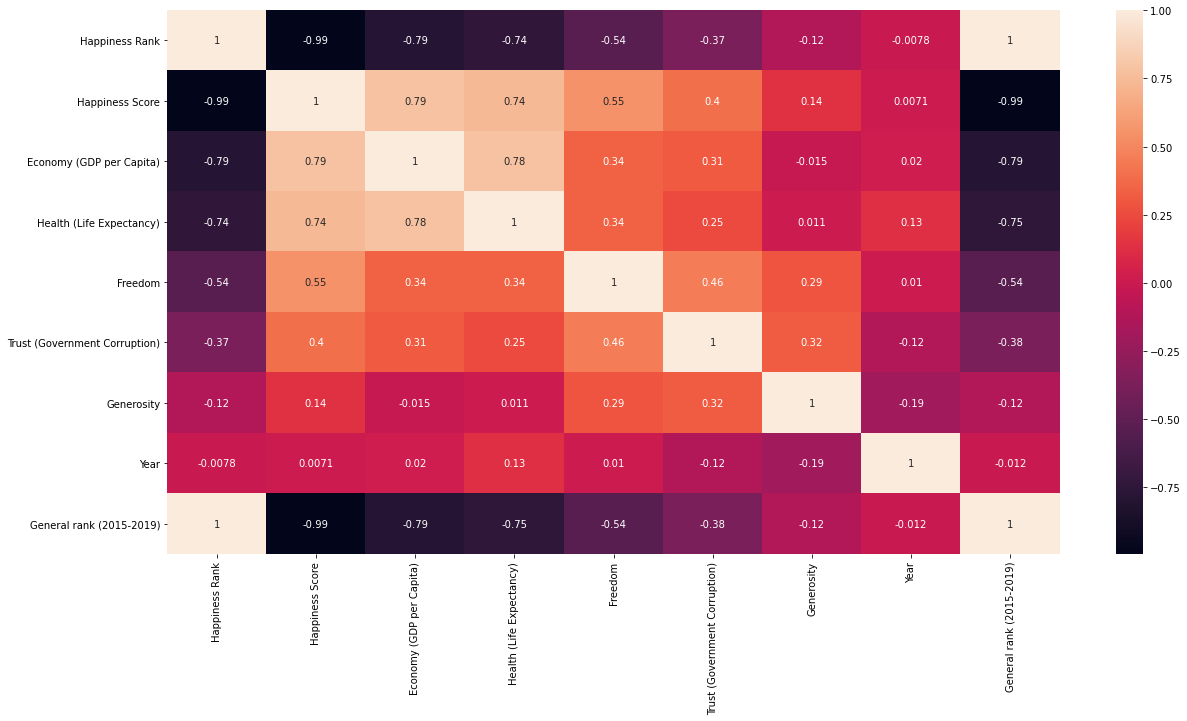

In [19]:
plt.figure(figsize=(20,10))

sns.heatmap(mer.corr(), annot=True)

#the most important numbers are GDP and Life Expectancy


In [25]:
mer.groupby(['Year']).mean()

# in average we will get happier and happier

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,General rank (2015-2019)
Year,,,,,,,,
2015,79.493671,5.375734,0.846137,0.630259,0.428615,0.143422,0.237296,394.000000
2016,78.980892,5.382185,0.953880,0.557619,0.370994,0.137624,0.242635,391.910828
2017,78.000000,5.354019,0.984718,0.551341,0.408786,0.123120,0.246883,395.290323
2018,78.500000,5.375917,0.891449,0.597346,0.454506,0.113205,0.181006,391.496795
2019,78.500000,5.407096,0.905147,0.725244,0.392571,0.110603,0.184846,384.791667
